# Import all modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# load the data
data = pd.read_csv('/Users/adhivp/Desktop/FraudSense AI/Dataset/Combined_data.csv')
data.head()
#Drop unnecessary column
data = data.drop(['Domain'], axis = 1).copy()

# Split the Dataset

In [4]:
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

# Define the model

In [6]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# Train the model

In [7]:
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

# Test the model

In [8]:
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [9]:
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("MLP: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("MLP : Accuracy on test Data: {:.3f}".format(acc_test_mlp))

MLP: Accuracy on training Data: 0.862
MLP : Accuracy on test Data: 0.867


## Confusion Matrix

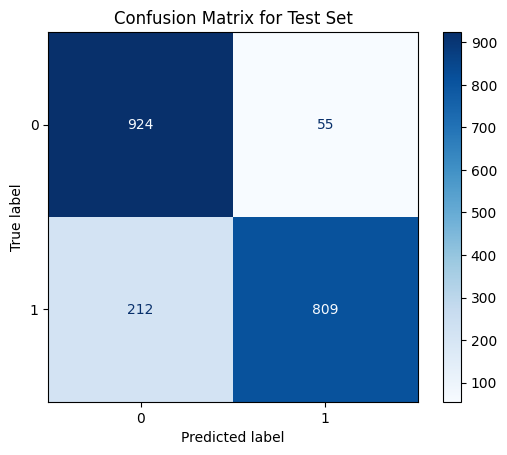

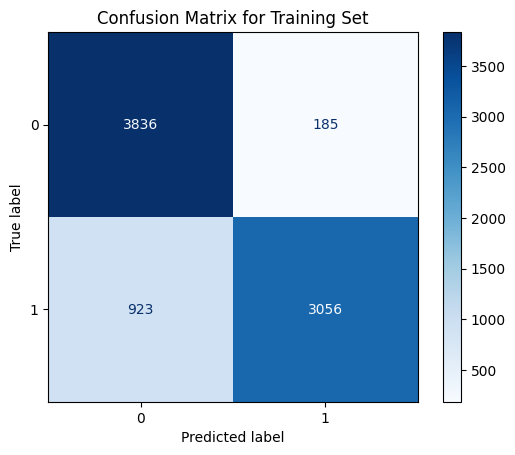

In [11]:

cm_test = confusion_matrix(y_test, y_test_mlp)
cm_train = confusion_matrix(y_train, y_train_mlp)

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=mlp.classes_)
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test Set')
plt.show()

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=mlp.classes_)
disp_train.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Training Set')
plt.show()

## Save the model

In [12]:
joblib.dump(mlp, 'MLP.pkl')

['MLP.pkl']